In [11]:
import pandas as pd
import pandas as pd
import numpy as np
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from scipy.stats import bernoulli
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import classification_report, plot_confusion_matrix,fbeta_score, make_scorer

import time

In [2]:
def show_decision_region(x, y, clf, f0, f1):
    plot_decision_regions(x, y, clf=clf)
    plt.xlabel(f0)
    plt.ylabel(f1)
    if clf.__class__.__name__ == "KNeighborsClassifier":
        plt.title(clf.__class__.__name__ + " k = " + str(clf.n_neighbors))
    else:
        plt.title(clf.__class__.__name__)
    plt.show()

In [3]:
time_begin = time.time()
data = pd.read_csv("wine_quality.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         6497 non-null   float64
 1   volatile.acidity      6497 non-null   float64
 2   citric.acid           6497 non-null   float64
 3   residual.sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free.sulfur.dioxide   6497 non-null   float64
 6   total.sulfur.dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


## Divisão de base de dados e separação de base

In [16]:
X = data[["fixed.acidity","volatile.acidity","citric.acid","residual.sugar","chlorides","free.sulfur.dioxide","total.sulfur.dioxide","density","pH","sulphates","alcohol"]]
y = data[["quality"]]
#X = data.iloc[:, 0:11].values
#y = data.iloc[:, 11].values

In [25]:
# definição de classes e features
class_a = 5
class_b = 6
feature_0 = "alcohol"
feature_1 = "free.sulfur.dioxide"
#feature_2 = "volatile.acidity"
#feature_3 = "sulphates"
#feature_4 = "density"

# filtrar classes e features
class_0_instances = (y.values == class_a)
class_1_instances = (y.values == class_b)

filtered_y = y[class_0_instances | class_1_instances]
filtered_X = X[class_0_instances | class_1_instances]
filtered_X = filtered_X[[feature_0, feature_1]]
#filtered_X = filtered_X[[feature_0, feature_1,feature_2,feature_3,feature_4]]

X_train, X_test, y_train, y_test = train_test_split(filtered_X, filtered_y, test_size=0.1, random_state=199)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=199)

# X_train, X_test, y_train, y_test = train_test_split(attributes, quality, test_size=0.1, random_state=199)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=199)


Text(0, 0.5, 'free.sulfur.dioxide')

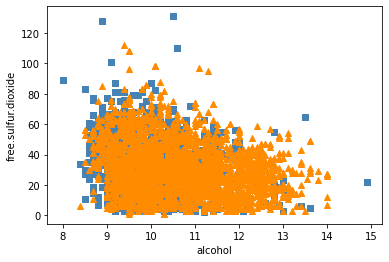

In [26]:
colors = {0: "steelblue", 1: "darkorange"}
markers = {0: "s", 1: "^"}

class_0_instances = (y == 5)
class_1_instances = (y == 6)
feature_0 = "alcohol"
feature_1 = "free.sulfur.dioxide"

filtered_y = y[class_0_instances["quality"] | class_1_instances["quality"]]
filtered_X = X[class_0_instances["quality"] | class_1_instances["quality"]]
filtered_X = filtered_X[[feature_0, feature_1]]

plt.scatter(X[feature_0][class_0_instances["quality"]], X[feature_1][class_0_instances["quality"]], c=colors[0], marker=markers[0])
plt.scatter(X[feature_0][class_1_instances["quality"]], X[feature_1][class_1_instances["quality"]], c=colors[1], marker=markers[1])

plt.xlabel("alcohol")
plt.ylabel("free.sulfur.dioxide")

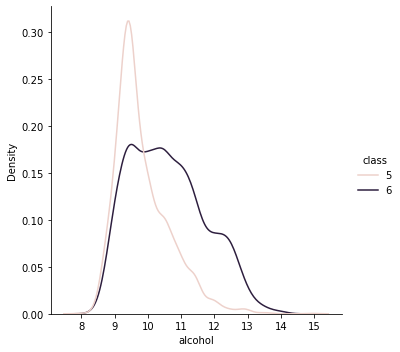

feature_0 class_0 mean: 9.8378, std: 0.8144
feature_0 class_1 mean: 10.5876, std: 1.1265


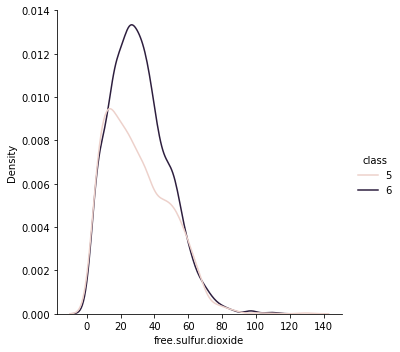

feature_1 class_0 mean: 30.2374, std: 18.5655
feature_1 class_1 mean: 31.1650, std: 16.8355


In [27]:
# qual a ditribuição da variável alcohol para as duas classes?

plot_data = filtered_X
plot_data["class"] = filtered_y

# visualizando a distribuição da variável alcohol para as duas classes
sns.displot(plot_data, x=feature_0, hue="class", kind="kde")
plt.show()
# calculando a média e desvio padrão da feature alcohol para as duas classes
print("feature_0 class_0 mean: %.4f, std: %.4f" %(filtered_X[feature_0][class_0_instances["quality"]].mean(), filtered_X[feature_0][class_0_instances["quality"]].std()))
print("feature_0 class_1 mean: %.4f, std: %.4f" %(filtered_X[feature_0][class_1_instances["quality"]].mean(), filtered_X[feature_0][class_1_instances["quality"]].std()))

# visualizando a distribuição da variável color_intensity para as duas classes
sns.displot(plot_data, x=feature_1, hue="class", kind="kde")
plt.show()
# calculando a média e desvio padrão da feature color_intensity para as duas classes
print("feature_1 class_0 mean: %.4f, std: %.4f" %(filtered_X[feature_1][class_0_instances["quality"]].mean(), filtered_X[feature_1][class_0_instances["quality"]].std()))
print("feature_1 class_1 mean: %.4f, std: %.4f" %(filtered_X[feature_1][class_1_instances["quality"]].mean(), filtered_X[feature_1][class_1_instances["quality"]].std()))

              precision    recall  f1-score   support

           5       0.69      0.54      0.61       278
           6       0.55      0.70      0.61       220

    accuracy                           0.61       498
   macro avg       0.62      0.62      0.61       498
weighted avg       0.63      0.61      0.61       498



C:\Users\cfpc2\anaconda3\envs\rv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cfpc2\anaconda3\envs\rv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


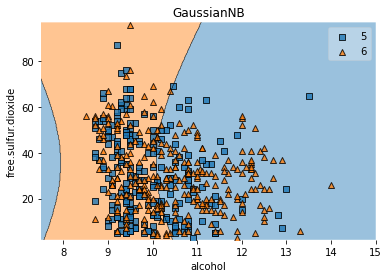

In [29]:
model = GaussianNB()
model.fit(X_train, y_train)

print(classification_report(model.predict(X_test), y_test))

show_decision_region(
    np.array(
        [
            X_test[feature_0].values, 
            X_test[feature_1].values,
        ]
    ).T, 
    y_test["quality"].values, 
    model, 
    feature_0, 
    feature_1
)

              precision    recall  f1-score   support

           5       0.00      0.00      0.00         0
           6       1.00      0.56      0.72       498

    accuracy                           0.56       498
   macro avg       0.50      0.28      0.36       498
weighted avg       1.00      0.56      0.72       498



C:\Users\cfpc2\anaconda3\envs\rv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cfpc2\anaconda3\envs\rv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cfpc2\anaconda3\envs\rv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cfpc2\anaconda3\envs\rv\lib\site-packages\sklearn\metrics\_classification.py:1318: Undef

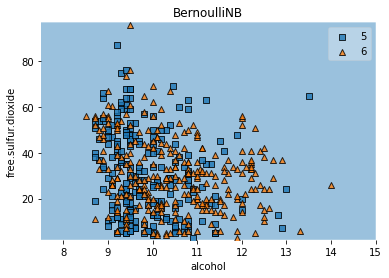

In [28]:
model_2 = BernoulliNB()
model_2.fit(X_train, y_train)

print(classification_report(model_2.predict(X_test), y_test))

show_decision_region(
    np.array(
        [
            X_test[feature_0].values, 
            X_test[feature_1].values,
        ]
    ).T, 
    y_test["quality"].values, 
    model_2, 
    feature_0, 
    feature_1
)

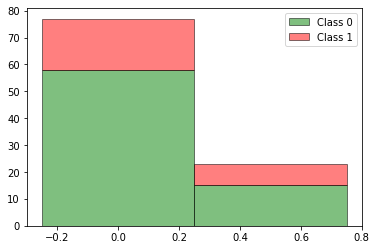

In [13]:
np.random.seed(199)
x1 = bernoulli.rvs(0.2, size=100)
x2 = bernoulli.rvs(0.4, size=100)

# criando um dataset com as duas distribuições
X = np.stack([x1, x2], axis=1)

# criando classes para essa distribuição
y = bernoulli.rvs(0.3, size=100)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=199)

# visualizando a distribuição de x1
_, bins, _ = plt.hist(
    [x1[y==0], x1[y==1]],
    2,
    alpha=0.5,
    histtype="bar",
    ec="black",
    label=["Class 0", "Class 1"],
    align="left",
    color=["g", "r"],
    stacked=True,
)
plt.legend(loc="upper right")
plt.show()

In [100]:
# treinando o modelo
model = BernoulliNB()
model.fit(X_train, y_train)

print(classification_report(model.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87        30
           1       0.00      0.00      0.00         0

    accuracy                           0.77        30
   macro avg       0.50      0.38      0.43        30
weighted avg       1.00      0.77      0.87        30



C:\Users\cfpc2\anaconda3\envs\rv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cfpc2\anaconda3\envs\rv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cfpc2\anaconda3\envs\rv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
